In [2]:
import mysql.connector
import pandas as pd
connection = mysql.connector.connect(
user='root',
password='12345',
host='localhost',
database='ecommerce'
)
# Create a cursor object to execute SQL queries
cursor = connection.cursor()
# Query data from the 'customer' table
cursor.execute('SELECT * FROM customer')
#After fetching data from the database we are storing it into Pandas DataFrame
customer_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in
cursor.description])
# Query data from the 'product' table
cursor.execute('SELECT * FROM product')
product_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in
cursor.description])
# Query data from the 'order_details' table
cursor.execute('SELECT * FROM order_details')
order_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in
cursor.description])
#printing first 5 records from each table
print(customer_data.tail())
print(product_data.head())
print(order_data.head())

  customer_id     name        city                  email    phone_no  \
3       c1001    steve       Tokyo        steve@gmail.com  4567897652   
4       c1002     john      Sydney         john@gmail.com  9635847562   
5       c1003    peter    kanagava  peterparker@gmail.com  7830847564   
6       c1004  jackson       Tokyo      jackson@gmail.com  7839847562   
7       c1005     jack  lake buana         jack@gmail.com  8876345621   

          address  pin_code  
3        f.g.road        99  
4        k.c.road     75001  
5   2f ikenobecho       171  
6  24-2,sendagaya      8429  
7     buena drive     32830  
  product_id product_name     category sub_category  original_price  \
0       p102        Chair    furniture       Chairs         20000.0   
1       p103       Laptop  Electronics     computer         60000.0   
2       p104   Smartphone  Electronics        Phone         45000.0   
3       p105      Blender    Appliance  Electronics           500.0   
4       p106    Laptop Hp 

In [1]:
!pip install mysql-connector-python

In [3]:
order_data

,order_id,customer_id,product_id,quantity,total_price,payment_mode,order_date,order_status
0,3,c1004,P102,1.0,1000.0,CDD,2023-11-30,Pending
1,4,c1005,P103,1.0,20000.0,CDD,2023-11-30,Pending
2,5,c1005,P104,1.0,20000.0,CDD,2023-12-08,Delivered
3,7,c1002,P105,1.0,55000.0,CDD,2023-12-15,Delivered
4,8,c1003,P106,1.0,15000.0,CDD,2023-12-01,Delivered


#checking for missing values

In [4]:
order_data.isnull().sum()

order_id        0
customer_id     0
product_id      0
quantity        0
total_price     0
payment_mode    0
order_date      0
order_status    0
dtype: int64

In [5]:
customer_data

,customer_id,name,city,email,phone_no,address,pin_code
0,101,Alok,Gorakhpur,alok@gmail.com,6330847562,pari chowk,273158
1,102,Alex,Noida,alex@gmail.com,9635847562,surajpur,201308
2,103,Aman,Greater_noida,aman@gmail.com,7830847564,alpha1,201308
3,c1001,steve,Tokyo,steve@gmail.com,4567897652,f.g.road,99
4,c1002,john,Sydney,john@gmail.com,9635847562,k.c.road,75001
5,c1003,peter,kanagava,peterparker@gmail.com,7830847564,2f ikenobecho,171
6,c1004,jackson,Tokyo,jackson@gmail.com,7839847562,"24-2,sendagaya",8429
7,c1005,jack,lake buana,jack@gmail.com,8876345621,buena drive,32830


In [6]:
customer_data.isnull().sum()

customer_id    0
name           0
city           0
email          0
phone_no       0
address        0
pin_code       0
dtype: int64

In [7]:
product_data

,product_id,product_name,category,sub_category,original_price,selling_price,stock
0,p102,Chair,furniture,Chairs,20000.0,15000.00,10
1,p103,Laptop,Electronics,computer,60000.0,55000.00,50
2,p104,Smartphone,Electronics,Phone,45000.0,40000.00,20
3,p105,Blender,Appliance,Electronics,500.0,450.00,10
4,p106,Laptop Hp,Electronics,Computer,67200.0,55000.99,50


In [8]:
product_data.isnull().sum()

product_id        0
product_name      0
category          0
sub_category      0
original_price    0
selling_price     0
stock             0
dtype: int64

In [9]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_id  8 non-null      object
 1   name         8 non-null      object
 2   city         8 non-null      object
 3   email        8 non-null      object
 4   phone_no     8 non-null      object
 5   address      8 non-null      object
 6   pin_code     8 non-null      int64 
dtypes: int64(1), object(6)
memory usage: 576.0+ bytes


In [10]:
customer_data.shape

(8, 7)

In [11]:
customer_data.describe()

,pin_code
count,8.000000
mean,99038.000000
std,109525.572437
min,99.000000
25%,6364.500000
50%,53915.500000
75%,201308.000000
max,273158.000000


In [12]:
order_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   order_id      5 non-null      int64         
 1   customer_id   5 non-null      object        
 2   product_id    5 non-null      object        
 3   quantity      5 non-null      float64       
 4   total_price   5 non-null      float64       
 5   payment_mode  5 non-null      object        
 6   order_date    5 non-null      datetime64[ns]
 7   order_status  5 non-null      object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 448.0+ bytes


In [14]:
order_data.describe()

,order_id,quantity,total_price,order_date
count,5.000000,5.0,5.000000,5
mean,5.400000,1.0,22200.000000,2023-12-04 19:12:00
min,3.000000,1.0,1000.000000,2023-11-30 00:00:00
25%,4.000000,1.0,15000.000000,2023-11-30 00:00:00
50%,5.000000,1.0,20000.000000,2023-12-01 00:00:00
75%,7.000000,1.0,20000.000000,2023-12-08 00:00:00
max,8.000000,1.0,55000.000000,2023-12-15 00:00:00
std,2.073644,0.0,19917.329138,NaN


In [15]:
product_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      5 non-null      object 
 1   product_name    5 non-null      object 
 2   category        5 non-null      object 
 3   sub_category    5 non-null      object 
 4   original_price  5 non-null      float64
 5   selling_price   5 non-null      float64
 6   stock           5 non-null      int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 408.0+ bytes


In [16]:
product_data.duplicated().sum()

np.int64(0)

# Exploratory Data Analysis

In [17]:
customer_data.value_counts()

customer_id  name     city           email                  phone_no    address         pin_code
101          Alok     Gorakhpur      alok@gmail.com         6330847562  pari chowk      273158      1
102          Alex     Noida          alex@gmail.com         9635847562  surajpur        201308      1
103          Aman     Greater_noida  aman@gmail.com         7830847564  alpha1          201308      1
c1001        steve    Tokyo          steve@gmail.com        4567897652  f.g.road        99          1
c1002        john     Sydney         john@gmail.com         9635847562  k.c.road        75001       1
c1003        peter    kanagava       peterparker@gmail.com  7830847564  2f ikenobecho   171         1
c1004        jackson  Tokyo          jackson@gmail.com      7839847562  24-2,sendagaya  8429        1
c1005        jack     lake buana     jack@gmail.com         8876345621  buena drive     32830       1
Name: count, dtype: int64

In [18]:
import matplotlib.pyplot as plt

# ● Customer Analysis:
○ Identify the total number of customers City wise.

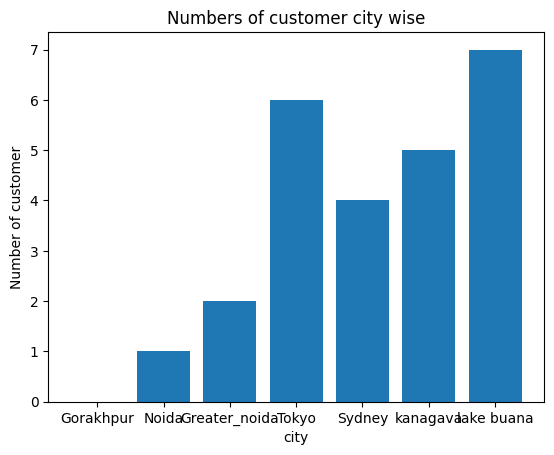

In [19]:
plt.bar(customer_data['city'].values,customer_data['name'].index)
plt.title('Numbers of customer city wise')
plt.xlabel('city')
plt.ylabel('Number of customer')
plt.show()

#  Identify the most frequent customers based on their order history.

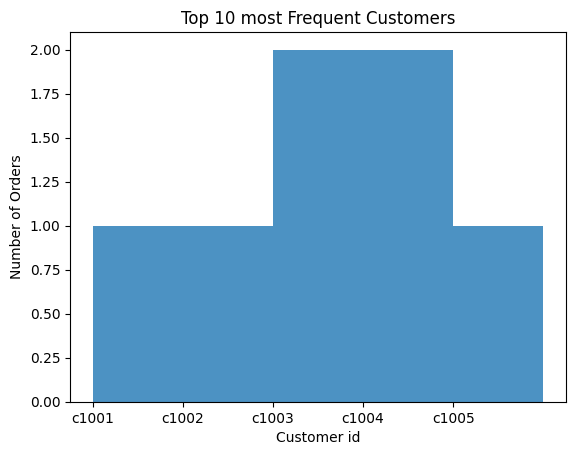

In [20]:
plt.hist(customer_data['customer_id'],order_data['order_id'].values,alpha=0.8)
plt.title('Top 10 most Frequent Customers')
plt.xlabel('Customer id')
plt.ylabel('Number of Orders')
plt.show()

In [21]:
order_data['quantity'].value_counts()

quantity
1.0    5
Name: count, dtype: int64

In [22]:
order_data

,order_id,customer_id,product_id,quantity,total_price,payment_mode,order_date,order_status
0,3,c1004,P102,1.0,1000.0,CDD,2023-11-30,Pending
1,4,c1005,P103,1.0,20000.0,CDD,2023-11-30,Pending
2,5,c1005,P104,1.0,20000.0,CDD,2023-12-08,Delivered
3,7,c1002,P105,1.0,55000.0,CDD,2023-12-15,Delivered
4,8,c1003,P106,1.0,15000.0,CDD,2023-12-01,Delivered


# ● Product Analysis:
 Determine the total number of products available by category.

In [23]:
product_data

,product_id,product_name,category,sub_category,original_price,selling_price,stock
0,p102,Chair,furniture,Chairs,20000.0,15000.00,10
1,p103,Laptop,Electronics,computer,60000.0,55000.00,50
2,p104,Smartphone,Electronics,Phone,45000.0,40000.00,20
3,p105,Blender,Appliance,Electronics,500.0,450.00,10
4,p106,Laptop Hp,Electronics,Computer,67200.0,55000.99,50


In [24]:
product_data['category'].value_counts()

category
Electronics    3
furniture      1
Appliance      1
Name: count, dtype: int64

<Axes: xlabel='category'>

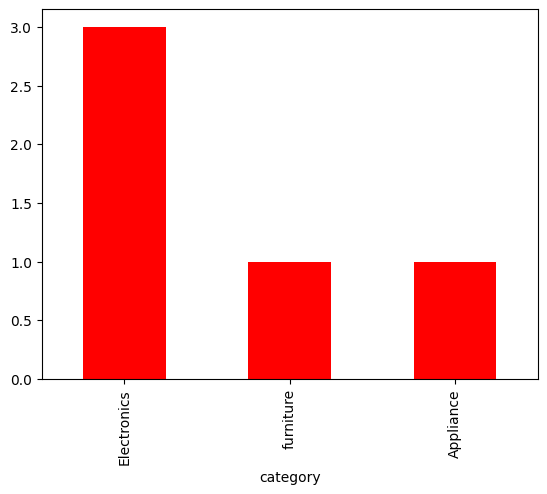

In [25]:
product_data['category'].value_counts().plot(kind='bar',color='red')

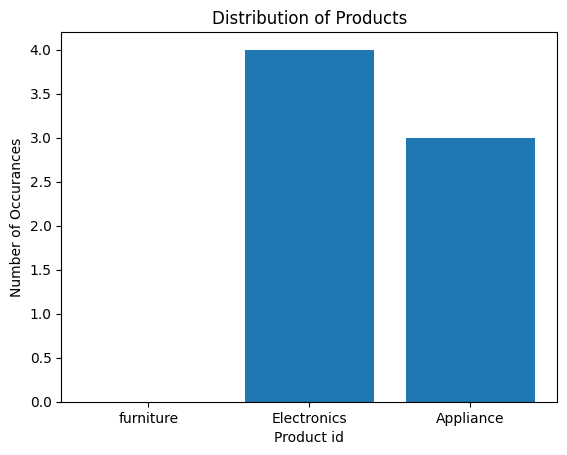

In [26]:
plt.bar(product_data['category'].values,product_data['product_id'].index)
plt.title('Distribution of Products')
plt.xlabel("Product id")
plt.ylabel('Number of Occurances')
plt.show()

#  Analyze the distribution of products across sub-categories.

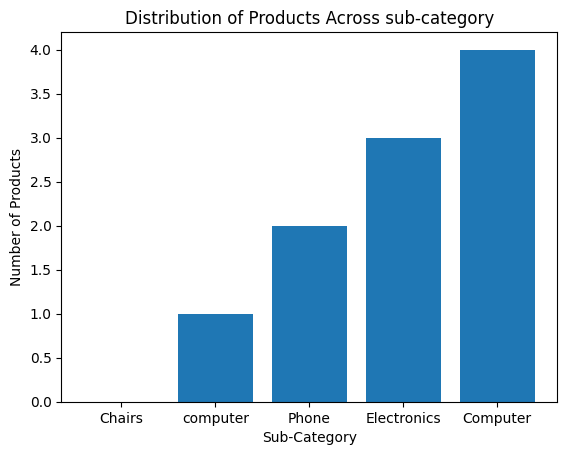

In [27]:
plt.bar(product_data['sub_category'].values,product_data['product_id'].index)
plt.title('Distribution of Products Across sub-category')
plt.xlabel("Sub-Category")
plt.ylabel('Number of Products')
plt.show()

#  Identify products with low stock levels.

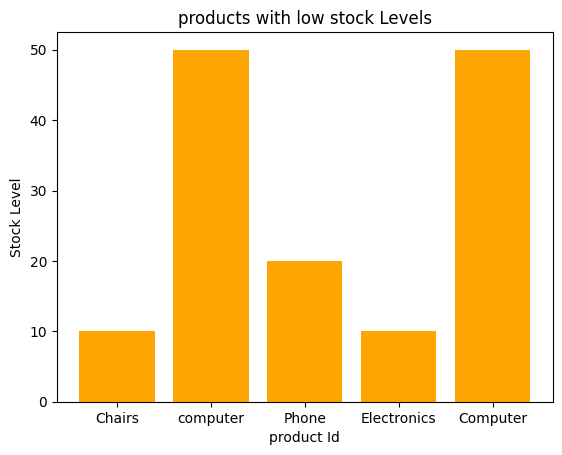

In [28]:
plt.bar(product_data['sub_category'].values,product_data['stock'].values,color='orange')
plt.title('products with low stock Levels')
plt.xlabel("product Id")
plt.ylabel('Stock Level')
plt.show()


#  Calculate the average, maximum, and minimum selling prices for products.

In [29]:
Avg_price=product_data['selling_price'].mean()
max_price=product_data['selling_price'].max()
min_price=product_data['selling_price'].min()

In [30]:
Avg_price

np.float64(33090.198)

In [31]:
max_price


np.float64(55000.99)

In [32]:
min_price

np.float64(450.0)

In [33]:
# creating data for bar chart
prices=[Avg_price,max_price,min_price]
labels=['Avg_price','max_price','min_price']

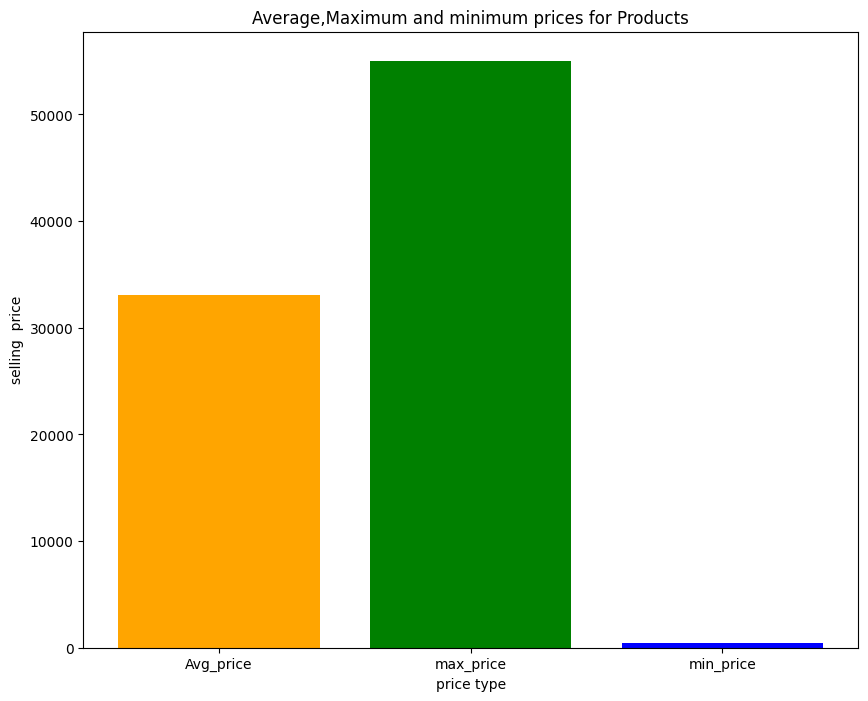

In [34]:
plt.figure(figsize=(10,8))
plt.bar(labels,prices,color=['orange','green','blue'])
plt.title('Average,Maximum and minimum prices for Products')
plt.xlabel('price type')
plt.ylabel('selling  price')
plt.show()

# ● Order Analysis:
 Calculate the top 10 orders product wise

In [35]:
top_order=product_data.sort_values(by='stock',ascending=False).head()

In [36]:
top_order

,product_id,product_name,category,sub_category,original_price,selling_price,stock
1,p103,Laptop,Electronics,computer,60000.0,55000.00,50
4,p106,Laptop Hp,Electronics,Computer,67200.0,55000.99,50
2,p104,Smartphone,Electronics,Phone,45000.0,40000.00,20
0,p102,Chair,furniture,Chairs,20000.0,15000.00,10
3,p105,Blender,Appliance,Electronics,500.0,450.00,10


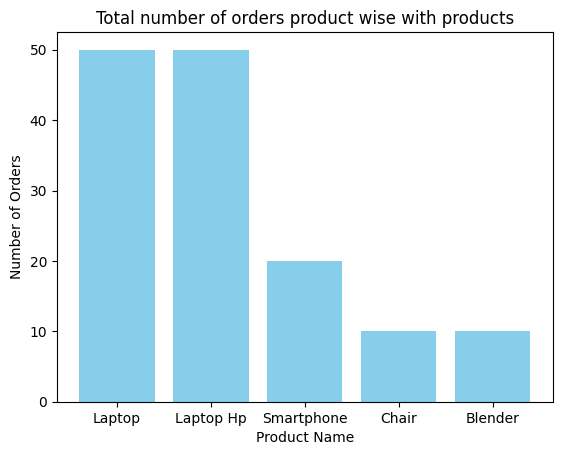

In [37]:
plt.bar(top_order['product_name'],top_order['stock'],color='skyblue')
plt.title("Total number of orders product wise with products")
plt.xlabel("Product Name")
plt.ylabel('Number of Orders')
plt.show()

In [39]:
order_status_count=order_data['order_status'].value_counts()

In [40]:
order_status_count

order_status
Delivered    3
Pending      2
Name: count, dtype: int64

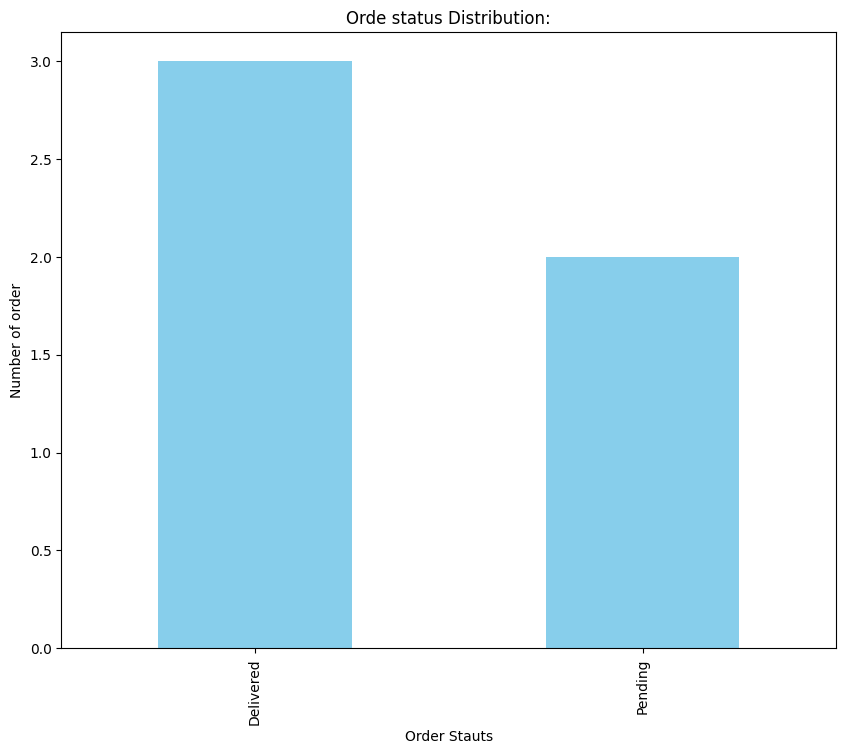

In [41]:
plt.figure(figsize=(10,8))
order_status_count.plot(kind='bar',color='skyblue')
plt.title("Orde status Distribution:")
plt.xlabel('Order Stauts')
plt.ylabel('Number of order')
plt.show()

In [42]:
product_data

,product_id,product_name,category,sub_category,original_price,selling_price,stock
0,p102,Chair,furniture,Chairs,20000.0,15000.00,10
1,p103,Laptop,Electronics,computer,60000.0,55000.00,50
2,p104,Smartphone,Electronics,Phone,45000.0,40000.00,20
3,p105,Blender,Appliance,Electronics,500.0,450.00,10
4,p106,Laptop Hp,Electronics,Computer,67200.0,55000.99,50


In [43]:
product_data['product_id']

0    p102
1    p103
2    p104
3    p105
4    p106
Name: product_id, dtype: object

In [54]:
product_quantity = order_data.groupby('product_name')['quantity'].sum().reset_index()

KeyError: 'product_name'

In [49]:
product_quantity

,product_id,quantity
0,P102,1.0
1,P103,1.0
2,P104,1.0
3,P105,1.0
4,P106,1.0


In [51]:
product_quantity_sorted = product_quantity.sort_values(by='quantity', ascending=False)

In [52]:
product_quantity_sorted 

,product_id,quantity
0,P102,1.0
1,P103,1.0
2,P104,1.0
3,P105,1.0
4,P106,1.0


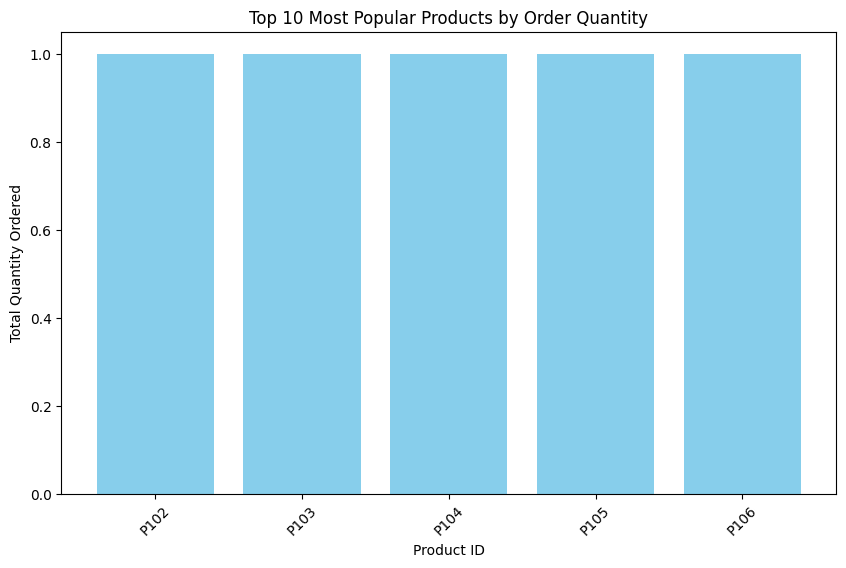

In [53]:
top_n = 10  # Set the number of top products you want to visualize
top_products = product_quantity_sorted.head(top_n)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(top_products['product_id'], top_products['quantity'], color='skyblue')
plt.title('Top 10 Most Popular Products by Order Quantity')
plt.xlabel('Product ID')
plt.ylabel('Total Quantity Ordered')
plt.xticks(rotation=45)
plt.show()

In [55]:
order_data


,order_id,customer_id,product_id,quantity,total_price,payment_mode,order_date,order_status
0,3,c1004,P102,1.0,1000.0,CDD,2023-11-30,Pending
1,4,c1005,P103,1.0,20000.0,CDD,2023-11-30,Pending
2,5,c1005,P104,1.0,20000.0,CDD,2023-12-08,Delivered
3,7,c1002,P105,1.0,55000.0,CDD,2023-12-15,Delivered
4,8,c1003,P106,1.0,15000.0,CDD,2023-12-01,Delivered


float64

Top 10 orders product-wise:
  product_id  total_price
0       P105      55000.0
1       P104      20000.0
2       P103      20000.0
3       P106      15000.0
4       P102       1000.0


<BarContainer object of 5 artists>

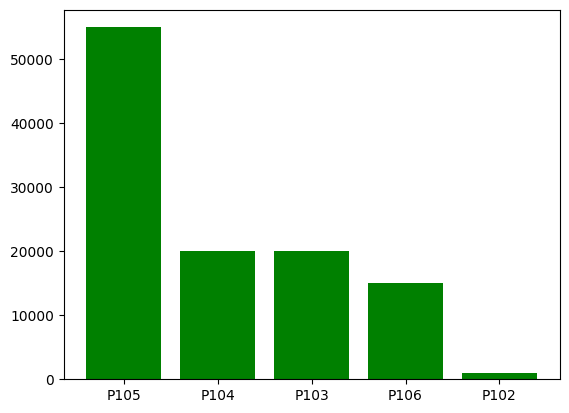

In [59]:
# Top 10 orders product-wise
print(order_data['total_price'].dtype)
order_data['total_price'] = pd.to_numeric(order_data['total_price'], errors='coerce')
order_data.dropna(subset=['total_price'], inplace=True)
top_10_orders = order_data.groupby('product_id')['total_price'].sum().nlargest(10).reset_index()
print("\nTop 10 orders product-wise:")
print(top_10_orders)
plt.bar(top_10_orders['product_id'], top_10_orders['total_price'], color='green')

# Sales Analysis

In [60]:
merged_data = pd.merge(order_data, product_data, on='product_id')

In [61]:
merged_data

,order_id,customer_id,product_id,quantity,total_price,payment_mode,order_date,order_status,product_name,category,sub_category,original_price,selling_price,stock


# Total revenue generated from orders product-wise

In [ ]:
revenue_productwise = merged_data.groupby('product_id')['total_price'].sum().reset_index()
print("\nTotal revenue generated from orders product-wise:")
print(revenue_productwise)
plt.bar(revenue_productwise['product_id'], revenue_productwise['total_price'], color='purple')
plt.title("Revenue Generated product wise")
plt.xlabel('product id')
plt.ylabel('Total price')
plt.show()

# Total revenue by product category percentage

In [67]:
category_revenue = merged_data.groupby('category')['total_price'].sum()
category_revenue_percentage = (category_revenue / category_revenue.sum()) * 100
print("\nTotal revenue by product category (percentage):")
print(category_revenue_percentage)


Total revenue by product category (percentage):
Series([], Name: total_price, dtype: float64)


# Pie Chart: Revenue by product category (percentage)

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(category_revenue_percentage, labels=category_revenue.index, autopct='%1.1f%%', startangle=140)
plt.title('Revenue by Product Category (Percentage)')
plt.tight_layout()
plt.show()

# -------------- Time-based Analysis ---------------- #

In [69]:
# Month-wise total sales
order_data['order_date'] = pd.to_datetime(order_data['order_date'])
monthwise_sales = order_data.groupby(order_data['order_date'].dt.to_period('M'))['total_price'].sum().reset_index()
print("\nMonth-wise total sales:")
print(monthwise_sales)


Month-wise total sales:
  order_date  total_price
0    2023-11      21000.0
1    2023-12      90000.0


# Line Chart: Month-wise total sales

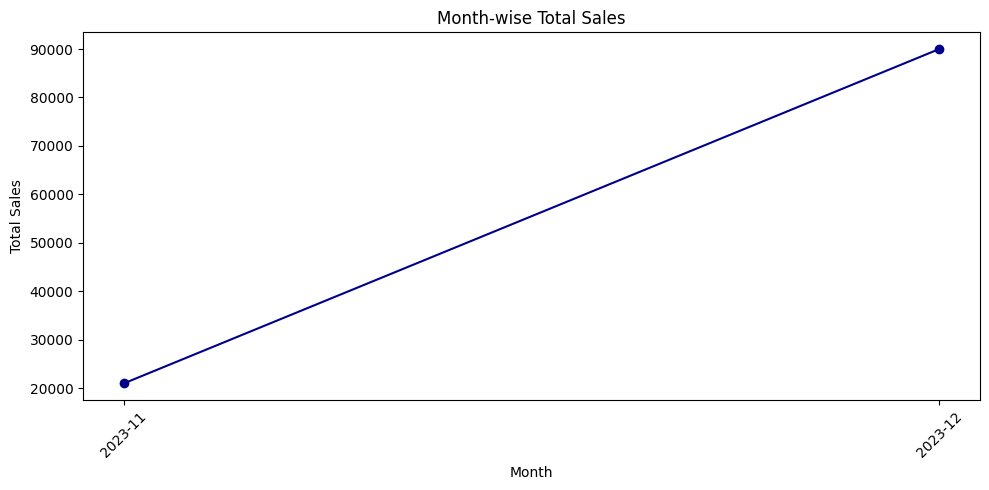

In [70]:
plt.figure(figsize=(10, 5))
plt.plot(monthwise_sales['order_date'].astype(str), monthwise_sales['total_price'], marker='o', color='darkblue')
plt.title('Month-wise Total Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# -------------- Order Analysis ---------------- #

Most frequent customers:
  customer_id  order_count
0       c1005            2
1       c1002            1
2       c1003            1
3       c1004            1


<BarContainer object of 4 artists>

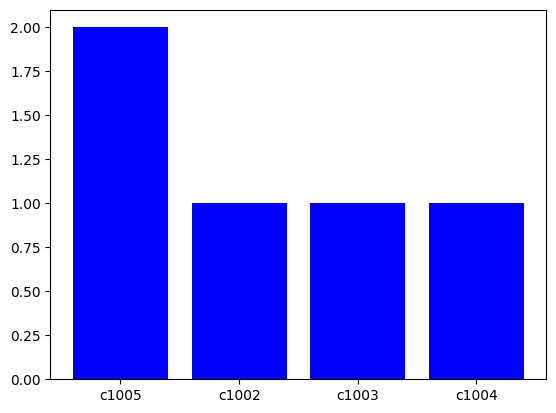

In [75]:
# Most frequent customers (Top 10) based on order history
customer_order_count = order_data.groupby('customer_id').size().nlargest(10).reset_index(name='order_count')
print("Most frequent customers:")
print(customer_order_count)
plt.bar(customer_order_count['customer_id'], customer_order_count['order_count'],color='blue' )

float64

Top 10 orders product-wise:
  product_id  total_price
0       P105      55000.0
1       P104      20000.0
2       P103      20000.0
3       P106      15000.0
4       P102       1000.0


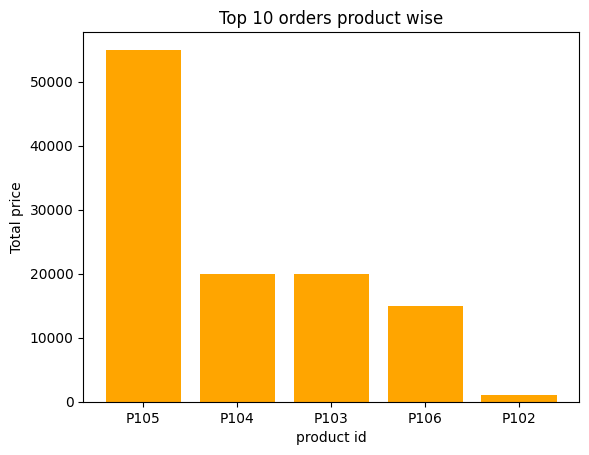

In [79]:
# Top 10 orders product-wise
print(order_data['total_price'].dtype)
order_data['total_price'] = pd.to_numeric(order_data['total_price'], errors='coerce')
order_data.dropna(subset=['total_price'], inplace=True)
top_10_orders = order_data.groupby('product_id')['total_price'].sum().nlargest(10).reset_index()
print("\nTop 10 orders product-wise:")
print(top_10_orders)
plt.bar(top_10_orders['product_id'], top_10_orders['total_price'], color='orange')
plt.title('Top 10 orders product wise')
plt.xlabel('product id')
plt.ylabel('Total price')
plt.show()


# -------------- Customer Retention Analysis ---------------- #

In [80]:
# Analyzing repeat customers and their order patterns
repeat_customers = customer_order_count[customer_order_count['order_count'] > 1]
print("\nRepeat customers:")
print(repeat_customers)



Repeat customers:
  customer_id  order_count
0       c1005            2


In [81]:
# Customer retention rate as percentage
customer_retention_rate = (len(repeat_customers) / len(customer_data)) * 100
print("\nCustomer retention rate: {:.2f}%".format(customer_retention_rate))



Customer retention rate: 12.50%


# -------------- Payment Analysis ---------------- #

In [82]:
# Display successful and pending payments
payment_status_count = order_data['order_status'].value_counts().reset_index(name='count')
print("\nPayment status (successful, pending):")
print(payment_status_count)


Payment status (successful, pending):
  order_status  count
0    Delivered      3
1      Pending      2
